In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    'figure.figsize': (7, 5),
    'figure.dpi': 100,
    'text.usetex': True,
    'font.family': 'serif',
    'font.size': 12,
})

sources = ['thread', 'parla', 'miniparla', 'cpp']
file = 'independent.log'
frames = []

for s in sources:
    name = s + '/' + file
    print(name)
    # Read in the data
    df = pd.read_csv(name, sep=', ', engine='python')
    frames.append(df)

    #print(df)


cpp/independent.log
miniparla/independent.log
parla/independent.log
thread/independent.log


In [38]:
def plot_speedup(ax, name, df, accesses, frac):

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    #Compute expected time
    df['expected'] = (df['task_time']*df['n'])/(1e6)

    #Select the data for the given accesses and frac
    df = df[(df['accesses'] == accesses) & (df['frac'] == frac)]
    for task_time in df['task_time'].unique():
        df2 = df[df['task_time'] == task_time]
        ax.plot(df2['workers'], df2['expected']/df2['total_time'], label=str(task_time/1e6) + 's')
    ax.set_title(name)
    ax.set_xlabel('Workers')
    ax.set_ylabel('Speedup')
    #plt.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


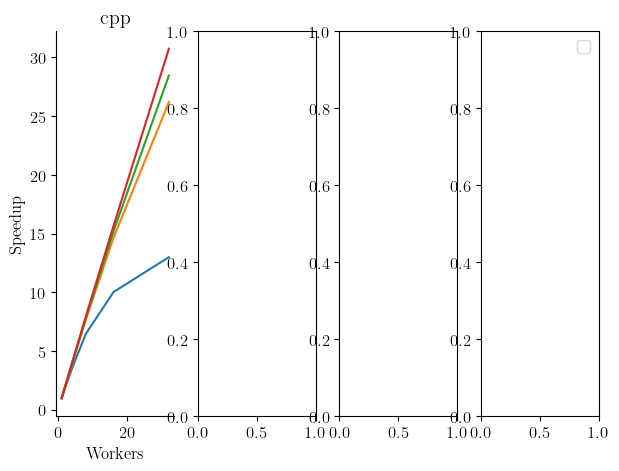

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


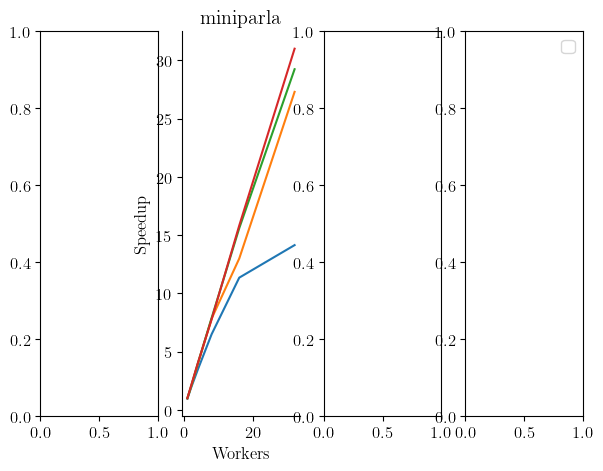

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


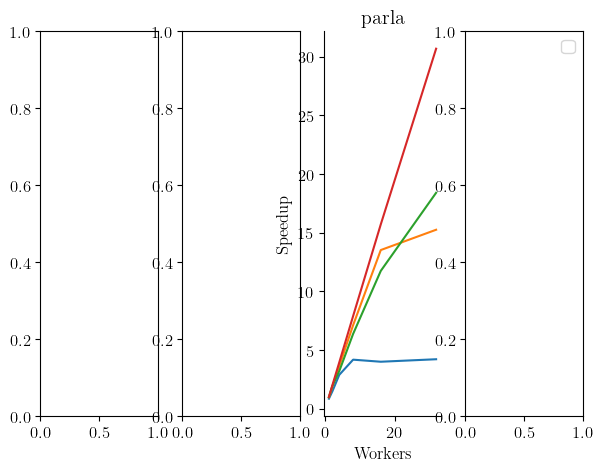

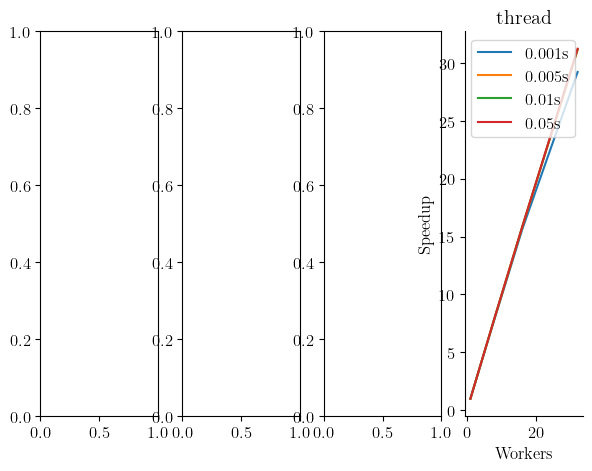

In [39]:
for i, name in enumerate(sources):
    fig, ax = plt.subplots(1, len(sources))
    plot_speedup(ax[i], name, frames[i], 1, 0)
    plt.legend()
    plt.show()

interactive(children=(Dropdown(description='Task Length:', options=(1000, 3000, 6000, 9000, 12000), value=1000…

<function __main__.plot_fraction_workers(df, time, accesses)>

interactive(children=(Dropdown(description='Task Length:', options=(50000,), value=50000), Dropdown(descriptio…

<function __main__.plot_access_workers(df, time, fraction)>

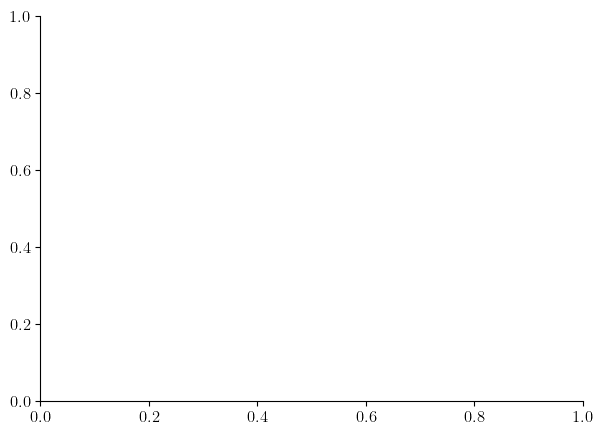